# Importing Libraries

In [1]:
pip install memory-profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-cp36-none-any.whl size=30181 sha256=b054d5a84ef6bdcd44955c23dc562407f5bcc27989cdffd75a2a161c942f54e3
  Stored in directory: /root/.cache/pip/wheels/02/e4/0b/aaab481fc5dd2a4ea59e78bc7231bb6aae7635ca7ee79f8ae5
Successfully built memory-profiler


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import psutil


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing dataset

In [4]:
data = pd.read_csv('heart.csv')

# Some basic operations to learn about the dataset

In [ ]:
data.shape

(303, 14)

In [ ]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

info about columns:
* sex: 0 for female 1 for male
* cp: chest pain type (4 values)
* trestbps: resting blood pressure
* chol: cholestoral
* fbs : fasting blood sugar
* restecg : resting electrocardiographic results 
* slope: the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
* oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms




In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


# Visualizing Database

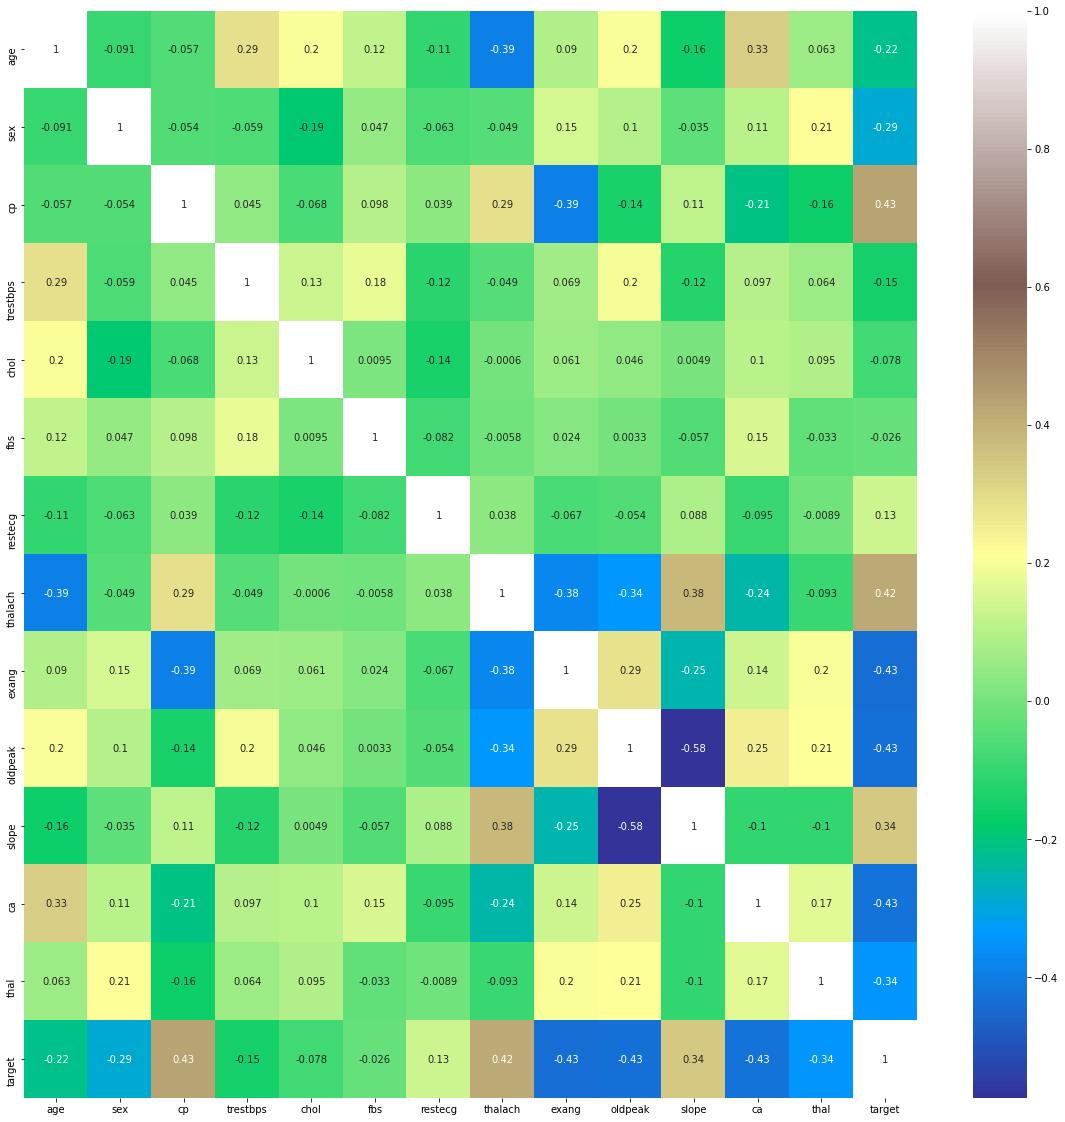

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="terrain")
#we observe positive correlation between target and cp, thalach,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

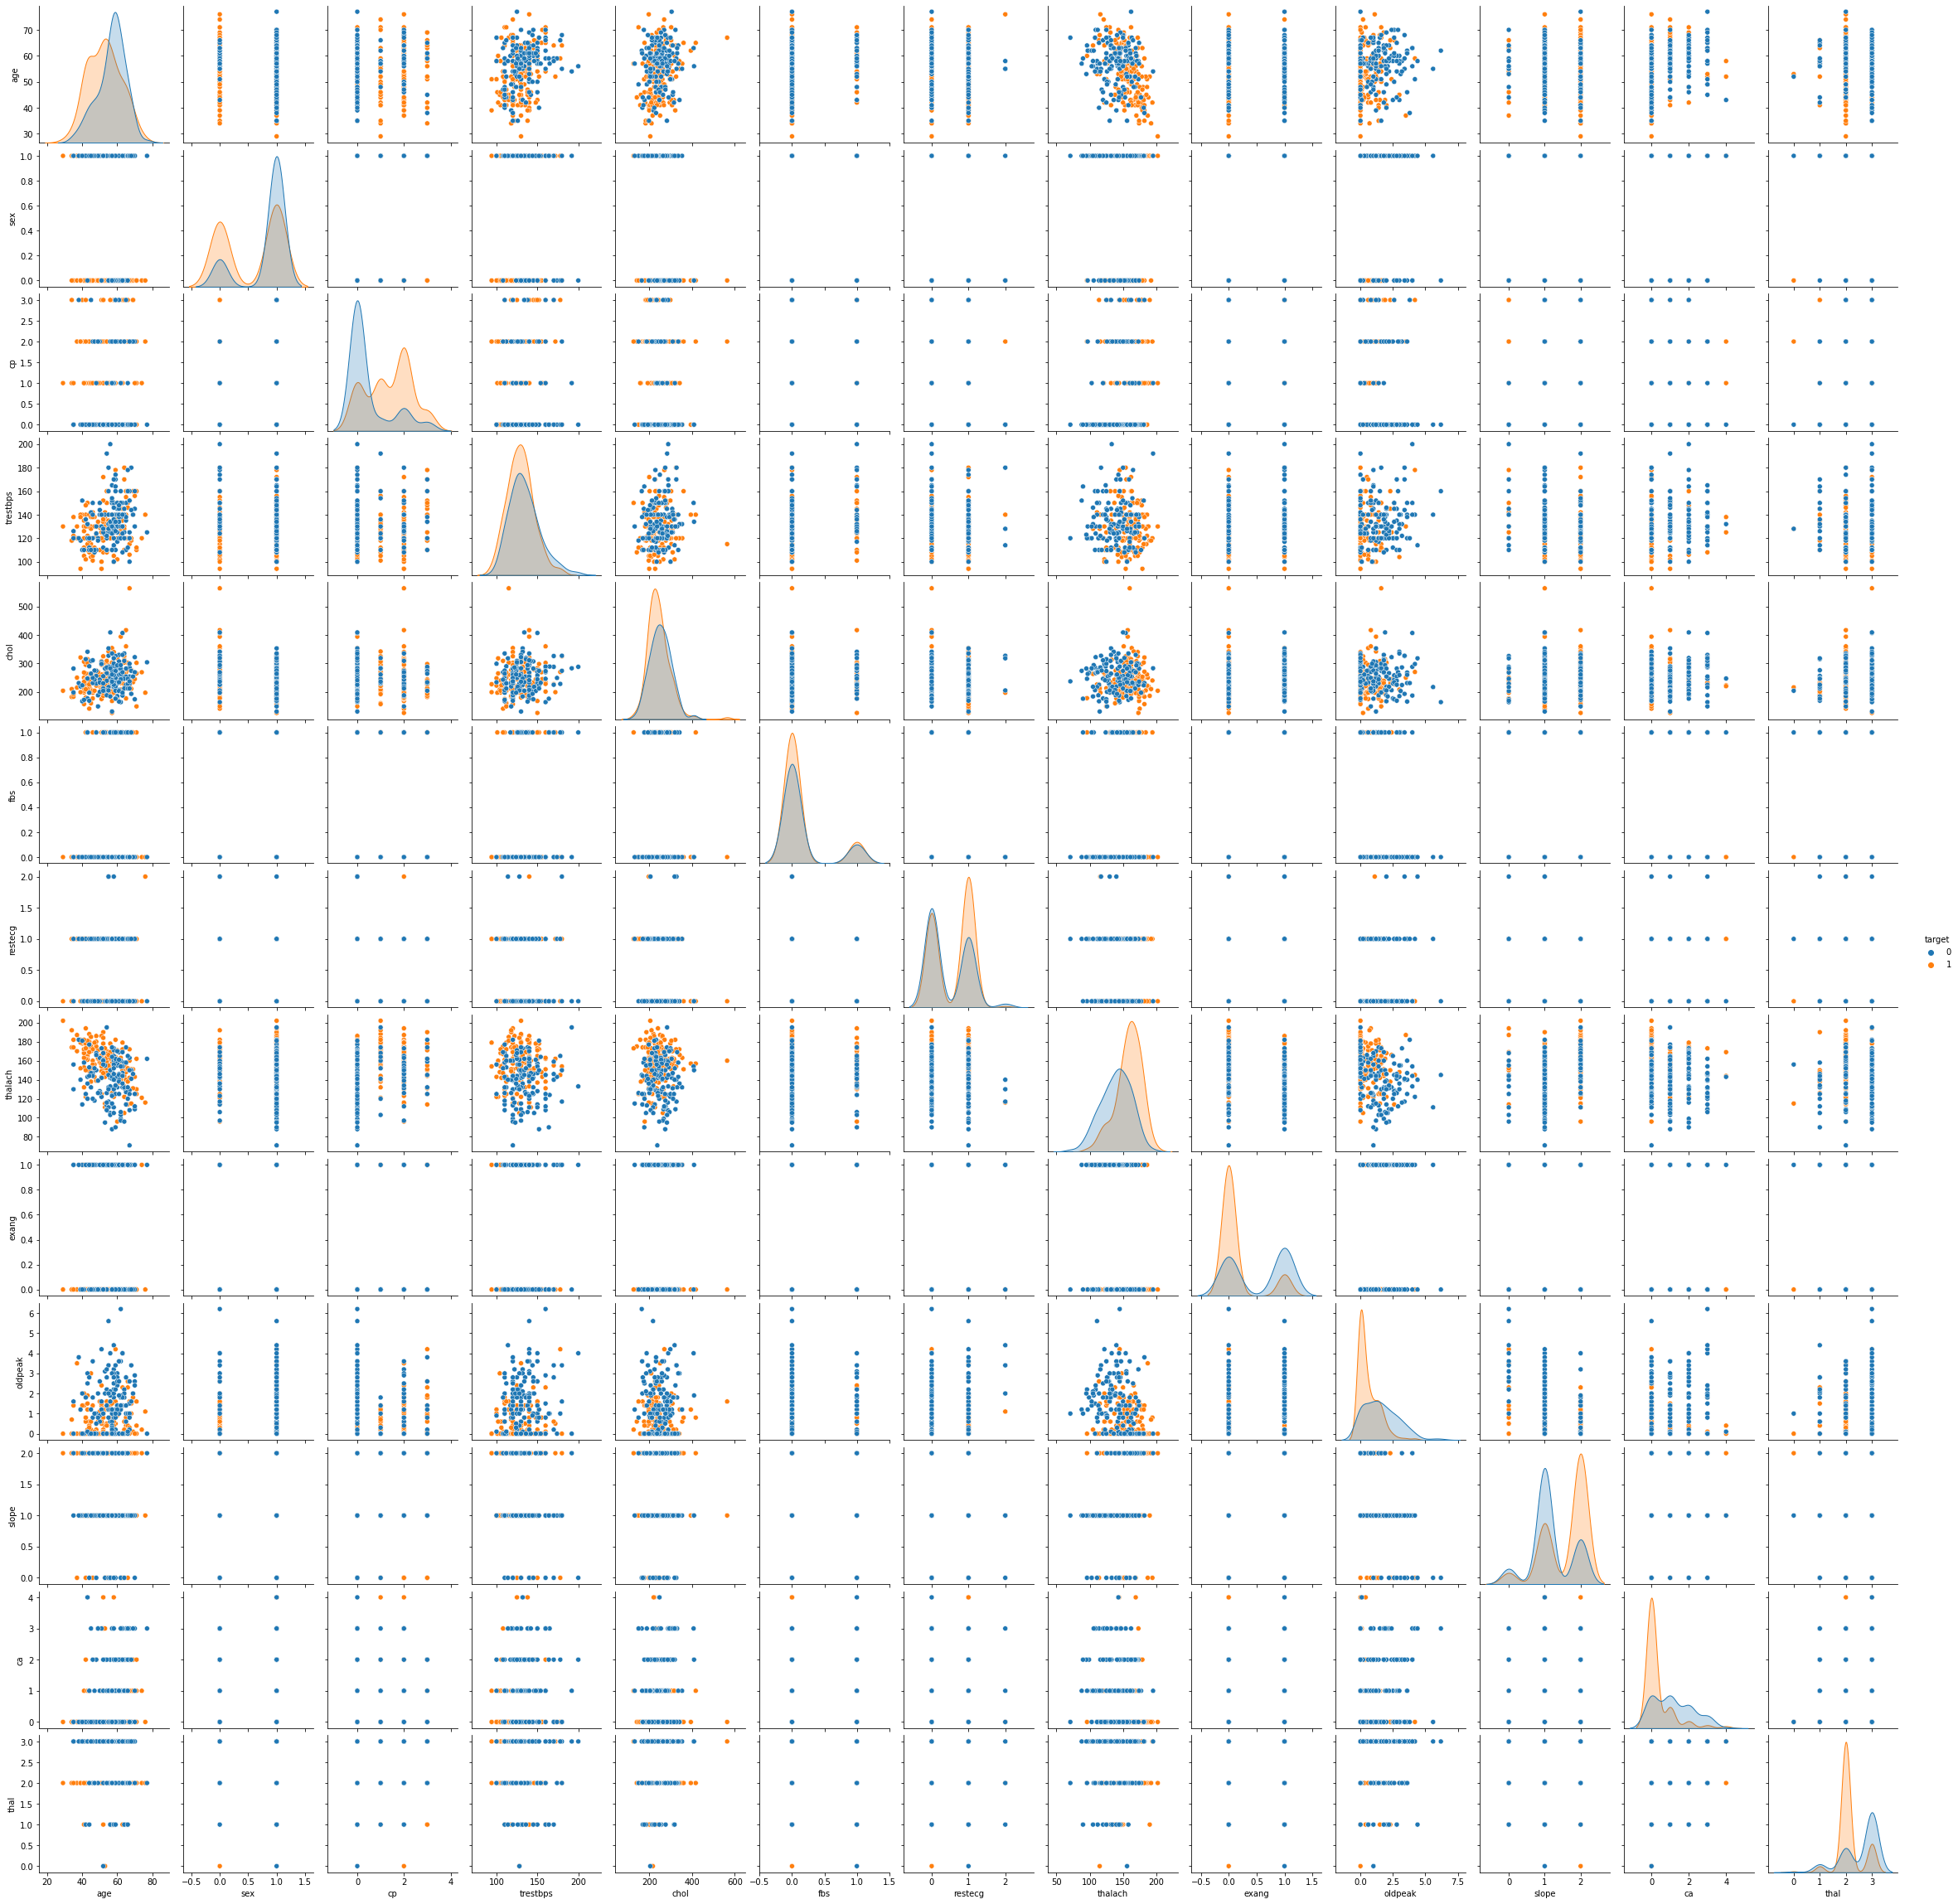

In [ ]:
sns.pairplot(df, hue='target')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d4d3cd828>,
      dtype=object)

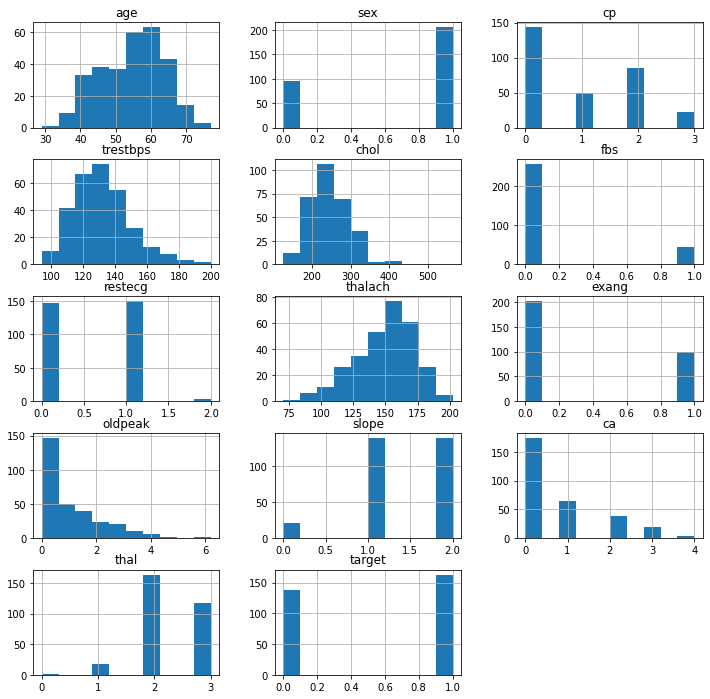

In [ ]:
df.hist(figsize=(12,12),layout=(5,3))

Number of Patients not diagnosed with Heart Disease: 138
Number of Patients diagnosed with Heart Disease: 163


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


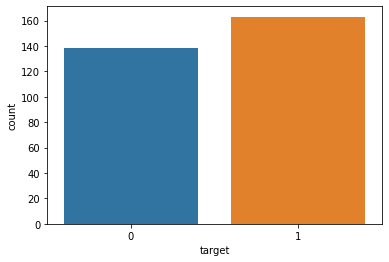

In [ ]:

y = df['target']
sns.countplot(y)
yes, no = y.value_counts()
print('Number of Patients not diagnosed with Heart Disease:', no)
print('Number of Patients diagnosed with Heart Disease:', yes)

Number of Female Patients: 96
Number of Male Patients: 205


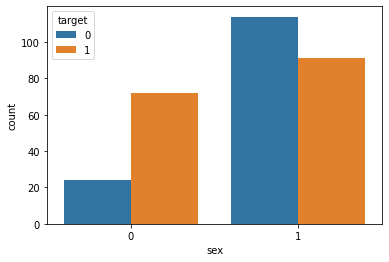

In [ ]:
sns.countplot(x="sex", data=df,hue='target')
male, fm = df['sex'].value_counts()
print('Number of Female Patients:', fm)
print('Number of Male Patients:', male)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; y

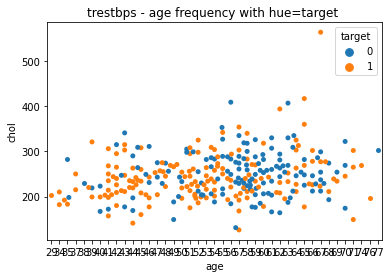

In [ ]:
sns.swarmplot(x="age",y="chol",data=df,hue="target")
plt.title("trestbps - age frequency with hue=target ")
plt.show()
#for this plot we can figure out that the most of people have high levels of cholesterin ,then borderline and good
#as well people with high chol and age between 40-55 huge percent have heart disease
#and the people 55 and above with high chol dont have heart disease.For me is a little strangle this output

# preprocessing

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.duplicated(subset=None, keep=False).value_counts()

False    301
True       2
dtype: int64

In [7]:
bool_series=data.duplicated(subset=None, keep=False)
df=data[~bool_series]
print("Before removing duplicates:")
print(data.shape)
print("After removing duplicate tuples:")
print(df.shape)

Before removing duplicates:
(303, 14)
After removing duplicate tuples:
(301, 14)


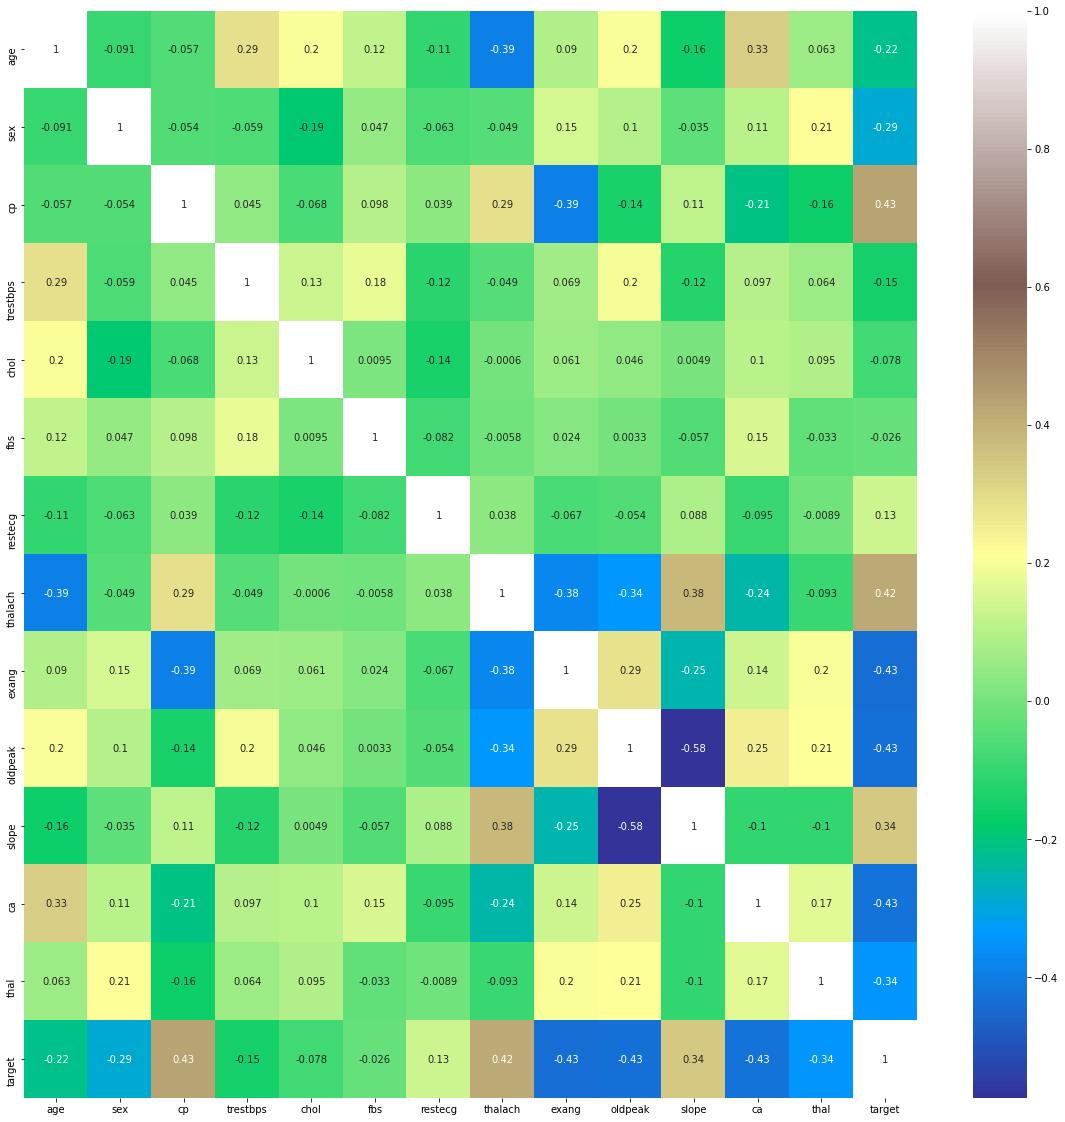

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df.corr(),annot=True,cmap="terrain")
#we observe positive correlation between target and cp, thalach,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

In [9]:
#we can see that chol, fbs, restecg have very low relation with target so we can remove these columns as 
#they are not contributing a lot towards decision making process
datas = df.drop(['chol'], axis = 1)
datas = df.drop(['fbs'], axis = 1)
datas = df.drop(['restecg'], axis = 1)

In [10]:
datas.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,163,1,0.6,2,0,2,1


In [11]:
dataset = pd.get_dummies(datas, columns = ['sex', 'cp', 'exang', 'slope', 'ca', 'thal'])


In [12]:
dataset

,age,trestbps,chol,fbs,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,1,150,2.3,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,0,187,3.5,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,0,172,1.4,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,0,178,0.8,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,0,163,0.6,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,123,0.2,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,45,110,264,0,132,1.2,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,68,144,193,1,141,3.4,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,57,130,131,0,115,1.2,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [13]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps',  'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [14]:
dataset

,age,trestbps,chol,fbs,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.947406,0.764179,233,1,0.022232,1.080696,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.942072,-0.090059,250,0,1.640529,2.115277,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.497537,-0.090059,204,0,0.984463,0.304760,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.169470,-0.659551,236,0,1.246889,-0.212530,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.280604,-0.659551,354,0,0.590823,-0.384960,1,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.280604,0.479433,241,0,-1.158687,-0.729821,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,-1.053002,-1.229043,264,0,-0.765047,0.132330,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,1.503075,0.707230,193,1,-0.371408,2.029062,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,0.280604,-0.090059,131,0,-1.508589,0.132330,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [15]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 301, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 5)

# K Nearest Neighbors

In [28]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

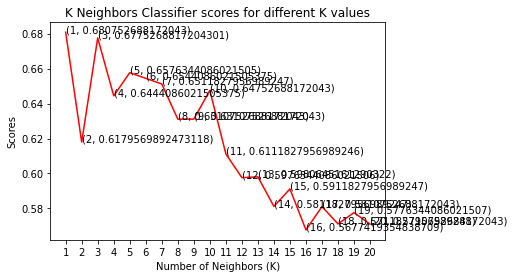

In [29]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [30]:
print("initial mem: ",psutil.virtual_memory())
start = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors = 10)
knn_classifier.fit(X_train, y_train)
end= time.time()
print(f"Runtime of training phase of knn is {end - start}")
print("final mem: ",psutil.virtual_memory())

initial mem:  svmem(total=13653602304, available=12790874112, percent=6.3, used=603267072, free=10558705664, active=774516736, inactive=2041262080, buffers=92389376, cached=2399240192, shared=1032192, slab=183541760)
Runtime of training phase of knn is 0.006509304046630859
final mem:  svmem(total=13653602304, available=12790874112, percent=6.3, used=603267072, free=10558705664, active=774516736, inactive=2041262080, buffers=92389376, cached=2399240192, shared=1032192, slab=183541760)


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
start = time.time()
y_pred = knn_classifier.predict(X_test)
end= time.time()
print(f"Runtime of testing phase of knn is {end - start}")
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n",cm)

Runtime of testing phase of knn is 0.009755849838256836
confusion matrix: 
 [[26 25]
 [15 35]]


In [32]:
accuracy_score(y_test, y_pred)

0.6039603960396039

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.51      0.57        51
           1       0.58      0.70      0.64        50

    accuracy                           0.60       101
   macro avg       0.61      0.60      0.60       101
weighted avg       0.61      0.60      0.60       101



# Naive bayes

In [ ]:
X_train

In [35]:
from sklearn.naive_bayes import GaussianNB
print("initial mem: ",psutil.virtual_memory())
classifier_GNB = GaussianNB()
start =time.time()
classifier_GNB.fit(X_train, y_train)
end= time.time()
print(f"Runtime of training phase of naive bayes is {end - start}")
print("final mem: ",psutil.virtual_memory())

initial mem:  svmem(total=13653602304, available=12792217600, percent=6.3, used=601976832, free=10559864832, active=774467584, inactive=2041417728, buffers=92413952, cached=2399346688, shared=1032192, slab=183635968)
Runtime of training phase of naive bayes is 0.0024340152740478516
final mem:  svmem(total=13653602304, available=12792217600, percent=6.3, used=601976832, free=10559864832, active=774467584, inactive=2041417728, buffers=92413952, cached=2399346688, shared=1032192, slab=183635968)


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
start =time.time()
y_pred1 = classifier_GNB.predict(X_test)
end= time.time()
print(f"Runtime of testing phase of naive bayes is {end - start}")
cm = confusion_matrix(y_test, y_pred1)
print("confusion matrix: \n",cm)

Runtime of testing phase of naive bayes is 0.001983165740966797
confusion matrix: 
 [[43  8]
 [10 40]]


In [37]:
accuracy_score(y_test, y_pred1)

0.8217821782178217

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        51
           1       0.83      0.80      0.82        50

    accuracy                           0.82       101
   macro avg       0.82      0.82      0.82       101
weighted avg       0.82      0.82      0.82       101



# Decision tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
print("initial mem: ",psutil.virtual_memory())
start = time.time()
model1 = DecisionTreeClassifier(criterion='entropy')
model1.fit(X_train,y_train)
end= time.time()
print(f"Runtime of the training phase of decision tree is {end - start}")
print("final mem: ",psutil.virtual_memory())

initial mem:  svmem(total=13653602304, available=12790542336, percent=6.3, used=603648000, free=10557763584, active=774541312, inactive=2041843712, buffers=92413952, cached=2399776768, shared=1032192, slab=183504896)
Runtime of the training phase of decision tree is 0.005825519561767578
final mem:  svmem(total=13653602304, available=12790542336, percent=6.3, used=603648000, free=10557763584, active=774541312, inactive=2041843712, buffers=92413952, cached=2399776768, shared=1032192, slab=183504896)


In [40]:
start =time.time()
y_pred1 = model1.predict(X_test)
end= time.time()
print(f"Runtime of the Testing of decision tree is {end - start}")

Runtime of the Testing of decision tree is 0.001569986343383789


In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred1)
print(cm)

[[40 11]
 [ 2 48]]


In [42]:
print(accuracy_score(y_test, y_pred1))

0.8712871287128713


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86        51
           1       0.81      0.96      0.88        50

    accuracy                           0.87       101
   macro avg       0.88      0.87      0.87       101
weighted avg       0.88      0.87      0.87       101



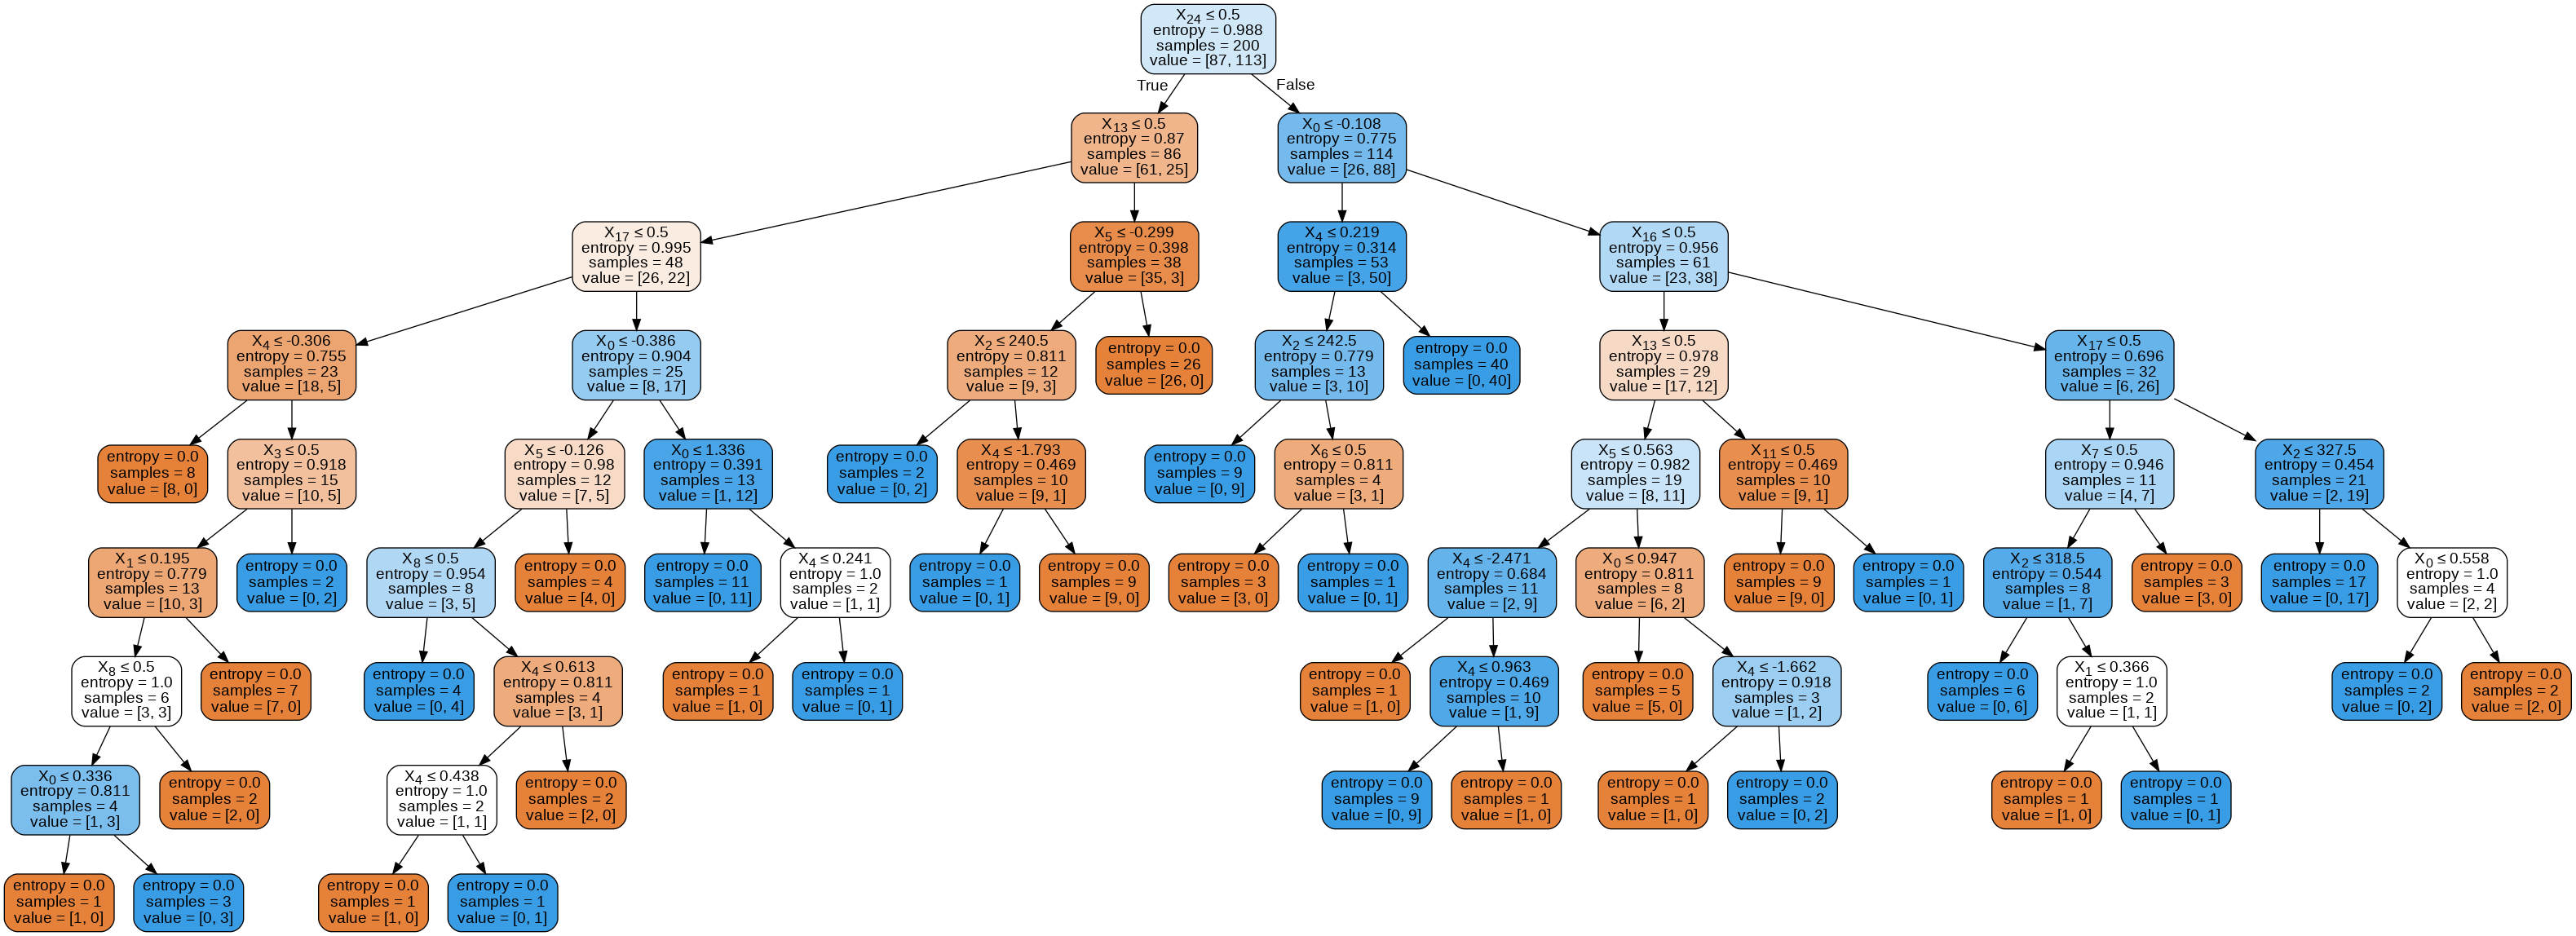

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model1,out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())